Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Sedykh Ivan"
COLLABORATORS = ""

---

In [3]:
import numpy as np

# Уравнение теплопроводности

Начально-краевая задача для уравнения теплопроводности с постоянным коэффициентом в общем виде можно записать следующим образом:
$$
\begin{array}{l}
\dfrac{\partial u}{\partial t} = \alpha \dfrac{\partial^2 u}{\partial x^2} + f(x, t), \; t > 0, \; x \in (0, l_x), \\
\left. u \right|_{t=0} = u_0(x), \\
\left. u \right|_{x=0} = \mu_1(t), \\
\left. u \right|_{x=l_x} = \mu_2(t),
\end{array}$$
где $u(x, t)$ - функция температуры, $\alpha = const$ - коэффициент теплопроводности, $f(x, t)$ - функция источника. 

## Явная схема

Запишем разностное уравнение явной схемы:
$$\dfrac{y_i^{k+1} - y_i^{k}}{\tau} = \alpha \dfrac{y_{i+1}^{k} - 2 y_i^{k} + y_{i-1}^{k}}{h^2} + f_i^k,$$
где $\tau$ и $h$ - шаги по времени и пространству, $y_i^k$ - значение приближённого решения в точке $(i, k)$ сетки, $f_i^k$ - значение функции источника в той же точке сетки. 

Аппроксимируем начальное и граничные условия:
$$
\begin{array}{l}
y_i^0 = u_0(x_i), \; \forall i = \overline{0, N},\\
y_0^k = \mu_1(t_k), \\
y_N^k = \mu_2(t_k), \; \forall k > 0.
\end{array}$$

Запрограммируйте явную разностную схему решения начально-краевой задачи для однородного уравнения теплопроводности. Обратите внимание, что 
$$\exists \lim\limits_{t \rightarrow \infty} u(x, t) = u_\infty (x).$$
поэтому расчёт в какой-то момент следует остановить (считать до установления).

Во время проведения расчетов помните о том, что явная схема *условно* устойчива.

In [31]:
def put_bounds(a, bound1, bound2, t):
   a[0] = bound1(t)
   a[-1] = bound2(t)
   return a


def heat_expl(init, bound1, bound2, alpha, lx, h, tau, tol=1e-3, rethist=False):
   """ Solve the heat equation `u_t = a*u_xx` for x in (0; lx) with an explicit scheme.

   Parameters
   ----------
   init : callable
      Initial condition
   bound1 : callable
      Boundary condition for x = 0
   bound1 : callable
      Boundary condition for x = lx
   alpha : float
      Thermal diffusivity
   h : float
      Spatial step
   tau : float
      Time step
   tol : float, optional
      Target tolerance.
      Stop iterations when the 2-norm of the difference between 
      solution on this time step and the next is less the tol.
      
   Returns
   -------
   t_end : ndarray, shape (n,)
      End time of calculation
   u_end : ndarray, shape (N,)
      Limit u_∞(x) (See above)
   """
   x_grid = np.arange(0, lx + 1e-5, h)
   n = len(x_grid)
   init = np.vectorize(init)

   # init layer 0 
   t = 0
   y = init(x_grid)
   y = put_bounds(y, bound1, bound2, t)
   history = y

   # make step
   while True:
      t += tau
      y_new = np.zeros_like(y)
      y_new = put_bounds(y_new, bound1, bound2, t)
      for j in range(1, n-1):
         y_new[j] = y[j] + tau * (alpha * (y[j-1] - 2*y[j] + y[j+1]) / h**2)

      if np.linalg.norm(y - y_new) < tol:
         break
      else:
         y = y_new
         history = np.vstack([history, y])

   if rethist:
      return t, y_new, history

   return t, y_new

Протестируйте Вашу функцию.

In [32]:
from numpy.testing import assert_allclose

t_0, u_0 = heat_expl(lambda x: 0., lambda x: 1., lambda x: 1., 
                     alpha=1., lx=1., h=0.1, tau=0.005) 
assert_allclose(u_0, np.ones(11), atol=1e-2)

t_1, u_1 = heat_expl(lambda x: np.sin(4.*x), lambda x: 0., lambda x: 0., 
                     alpha=1., lx=np.pi, h=0.1, tau=0.005) 
assert_allclose(u_1, np.zeros(32), atol=1e-2)


Определите порядки точности схемы (по пространству и времени) на тестовой задаче. Для этого для каждой переменной ($t$ или $x$):

1. Сделайте несколько расчётов для разных значений шага (например, $h_0, \; 2 h_0, \; 4 h_0$).
2. В один и тот же момент времени $t_1$ найдите ошибку полученных решений. Для этого либо возьмите аналитическое решение задачи, либо сравните результат в конечный момент времени, например, с решением в момент времени $0.99 t_1$. Обратите внимание, что имеющуюся функцию `heat_expl` надо немного модифицировать.
3. Найдите отношения этих ошибок. Сопоставьте полученные величины с порядком аппроксимации схемы по данной переменной.

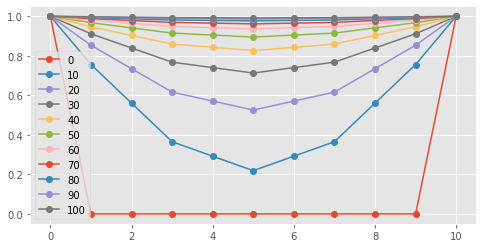

In [71]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(8, 4))

t_0, u_0, u = heat_expl(lambda x: 0., lambda x: 1., lambda x: 1., 
                     alpha=1., lx=1., h=0.1, tau=0.005, rethist=True) 
assert_allclose(u_0, np.ones(11), atol=1e-2)

for i in range(0, len(u), 10):
    plt.plot(u[i], 'o-', label=i)

plt.legend()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Неявная схема 

Запишем разностное уравнение неявной схемы:
$$\dfrac{y_i^{k+1} - y_i^{k}}{\tau} = \alpha \dfrac{y_{i+1}^{k+1} - 2 y_i^{k+1} + y_{i-1}^{k+1}}{h^2} + f_i^{k+1}.$$

Аппроксимировать начальное и граничные условия будем так же, как в случае явной схемы.

Запрограммируйте явную разностную схему решения начально-краевой задачи для однородного уравнения теплопроводности. Для решения системы линейных уравнений используйте встроенные функции `scipy`.

$$\dfrac{y_i^{k+1} - y_i^{k}}{\tau} = \alpha \dfrac{y_{i+1}^{k+1} - 2 y_i^{k+1} + y_{i-1}^{k+1}}{h^2}$$
$$\lambda = \dfrac{\alpha \tau}{h^2}$$
$$y_i^{k+1} - y_i^{k} = \lambda (y_{i+1}^{k+1} - 2 y_i^{k+1} + y_{i-1}^{k+1})$$

$$-\lambda y_{i+1}^{k+1} +(1+ 2\lambda) y_i^{k+1} -\lambda y_{i-1}^{k+1} = y_i^{k}$$

In [74]:
from scipy.linalg import solve_banded

In [75]:
def make_step(y, bound1, bound2, t, lam):
   n = len(y)
   ab = np.zeros(shape=(3, n-2))
   ab[0, 1:] = -lam #  upper diag
   ab[1] = 1 + 2*lam #  main diag
   ab[2, :-1] = -lam #  lower diag

   b = np.copy(y[1: -1])
   b[0] += lam * bound1(t)
   b[-1] += lam * bound2(t)

   y_new = np.zeros(shape=n)
   y_new[1: -1] = solve_banded(l_and_u=(1,1), ab=ab, b=b)
   y_new[0] = bound1(t)
   y_new[-1] = bound2(t)

   return y_new

def heat_impl(init, bound1, bound2, alpha, lx, h, tau, tol=1e-3, rethist=False):
   """ Solve heat equation u_t = a*u_xx for x in (0; lx) with implicit scheme

      Parameters
      ----------
      init : callable
         Initial condition
      bound1 : callable
         Boundary condition for x = 0
      bound1 : callable
         Boundary condition for x = lx
      alpha : float, optional
         Thermal diffusivity
      h : float
         Spatial step
      tau : float
         Time step
      tol : float, optional
         Target tolerance.
         Stop iterations when the 2-norm of the difference between 
         solution on this time step and the next is less the tol.
         
      Returns
      -------
      t_end : ndarray, shape (n,)
         End time of calculation
      u_end : ndarray, shape (N,)
         Limit u_∞(x) (See above)
   """

    
   x_grid = np.arange(0, lx + 1e-5, h) #  to include left bound
   n = len(x_grid)
   init = np.vectorize(init)

   lam = alpha * tau / h**2

   # init layer 0 
   t = 0
   y = init(x_grid)
   y = put_bounds(y, bound1, bound2, t)
   history = y

   # make step
   while True:
      t += tau
      y_new = make_step(y, bound1, bound2, t, lam)

      if np.linalg.norm(y - y_new) < 0.1*tol: #  почему-то ассерт не проходит иначе
         break
      else:
         y = y_new
         history = np.vstack([history, y])

   if rethist:
      return t, y_new, history
   return t, y_new

Протестируйте Вашу функцию.

In [76]:
from numpy.testing import assert_allclose

t_0, u_0 = heat_impl(lambda x: 0., lambda x: 1., lambda x: 1., 
                     alpha=1., lx=1., h=0.1, tau=0.005) 
assert_allclose(u_0, np.ones(11), atol=1e-2)

t_1, u_1 = heat_impl(lambda x: np.sin(4.*x), lambda x: 0., lambda x: 0., 
                     alpha=1., lx=np.pi, h=0.1, tau=0.005) 
assert_allclose(u_1, np.zeros(32), atol=1e-2)


Определите порядки точности схемы (по пространству и времени) на тестовой задаче. (см. выше)

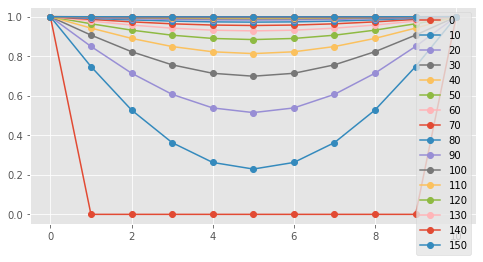

In [77]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(8, 4))

t_0, u_0, u = heat_impl(lambda x: 0., lambda x: 1., lambda x: 1., 
                     alpha=1., lx=1., h=0.1, tau=0.005, rethist=True) 
assert_allclose(u_0, np.ones(11), atol=1e-2)

for i in range(0, len(u), 10):
    plt.plot(u[i], 'o-', label=i)

plt.legend()

Решение получается более гладкое как будто -- более похоже на то что в жизни.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()